In [14]:
# libraries
import os
import sys
import cv2
import keras
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.engine.training import Model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Add, Dropout, Flatten, Dense, Activation

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
BASEPATH = "/content/gdrive/MyDrive/MDST/dogs-vs-cats/Images"

### Read in the dataset

In [ ]:
LABELS = set()
paths = []
for d in os.listdir(BASEPATH):
  LABELS.add(d)
  paths.append((BASEPATH + '/' + d, d))

# resizing and converting to RGB
def load_and_preprocess_image(path):
  image = cv2.imread(path)
  image = cv2.resize(image, (224, 224))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

X, y = [], []
i = 0
for path, label in paths:
  i += 1

  for image_path in os.listdir(path):
    image = load_and_preprocess_image(path + "/" + image_path)
    X.append(image)
    y.append(label)

In [ ]:
Y = []
# Cleaning the names of the directories/targets
for i in y:
  Y.append(i.split('-')[1])

### Verify the input data

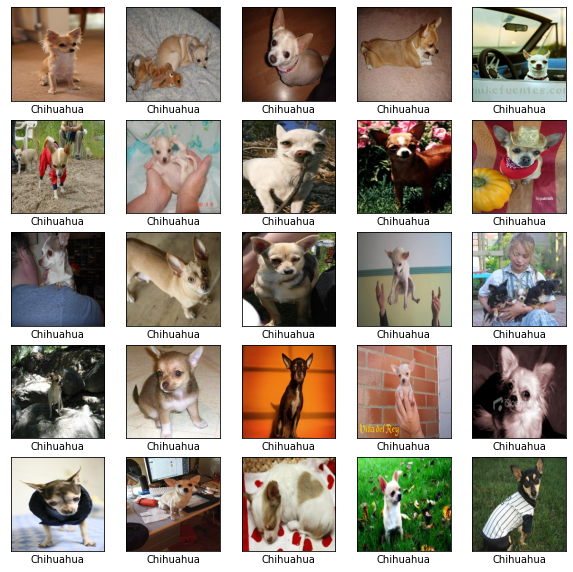

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap="gray")
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(Y[i])
plt.show()



# Label Binarizer

In [ ]:
#label binarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(np.array(y))

#Splitting the data

In [ ]:
X = np.array(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

In [15]:
# normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0